Dated 19/03/25

*   Aditi
*   M.Tech. CSA
*   242211001
*   Timestamp: 11.00 AM


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing (1).csv


In [26]:
df= pd.read_csv('BostonHousing.csv')

In [27]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['rm'], df['medv'], test_size=0.3, random_state=42)

In [34]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [35]:
X_train

array([[6.43 ],
       [6.176],
       [5.682],
       [5.935],
       [5.926],
       [6.398],
       [6.998],
       [5.683],
       [6.153],
       [5.741],
       [6.195],
       [6.376],
       [5.56 ],
       [6.674],
       [8.398],
       [6.185],
       [5.813],
       [6.172],
       [5.983],
       [6.474],
       [5.85 ],
       [6.943],
       [6.437],
       [5.872],
       [6.254],
       [6.546],
       [7.178],
       [6.538],
       [4.903],
       [4.906],
       [5.52 ],
       [6.212],
       [6.826],
       [6.951],
       [6.749],
       [5.019],
       [6.683],
       [5.878],
       [6.251],
       [6.319],
       [5.569],
       [5.887],
       [5.987],
       [6.8  ],
       [6.718],
       [6.229],
       [6.411],
       [6.13 ],
       [6.442],
       [5.012],
       [6.879],
       [7.236],
       [6.167],
       [6.433],
       [6.101],
       [8.375],
       [6.975],
       [7.412],
       [6.273],
       [6.122],
       [6.525],
       [8.259],
       [

In [36]:
class LinR() :
	def __init__( self, learning_rate, iterations ) :
		self.learning_rate = learning_rate
		self.iterations = iterations

	def fit( self, X, Y ) :
		self.m, self.n = X.shape
		self.W = np.zeros( self.n )
		self.b = 0
		self.X = X
		self.Y = Y
		for i in range( self.iterations ) :
			self.update_weights()
		return self

	def update_weights( self ) :
		Y_pred = self.predict( self.X )
		dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m
		self.W = self.W - self.learning_rate * dW
		self.b = self.b - self.learning_rate * db
		return self

	def predict( self, X ) :
		return X.dot( self.W ) + self.b


In [37]:
model = LinR( iterations = 1000, learning_rate = 0.01 )
model.fit( X_train, y_train )

In [38]:
y_pred = model.predict( X_test )

In [39]:
print( "Predicted values ", np.round( y_pred[:3], 2 ) )
print( "Real values	 ", y_test[:3] )
print( "Trained W	 ", round( model.W[0], 2 ) )
print( "Trained b	 ", round( model.b, 2 ) )


Predicted values  [23.79 25.44 21.7 ]
Real values	  173    23.6
274    32.4
491    13.6
Name: medv, dtype: float64
Trained W	  4.83
Trained b	  -7.19


X-test vs Y-test

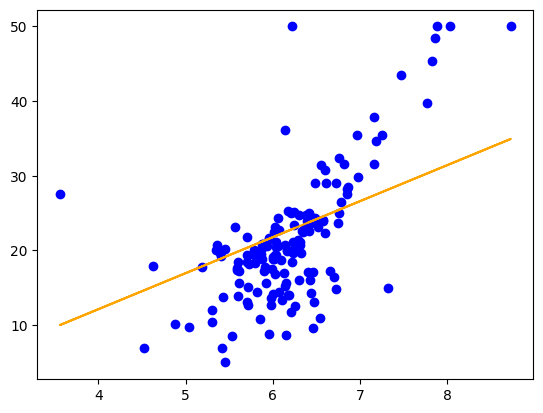

In [45]:
plt.scatter( X_test, y_test, color = 'blue' )
plt.plot( X_test, y_pred, color = 'orange' )
plt.title( '' )
plt.show()

X-train vs Y-train

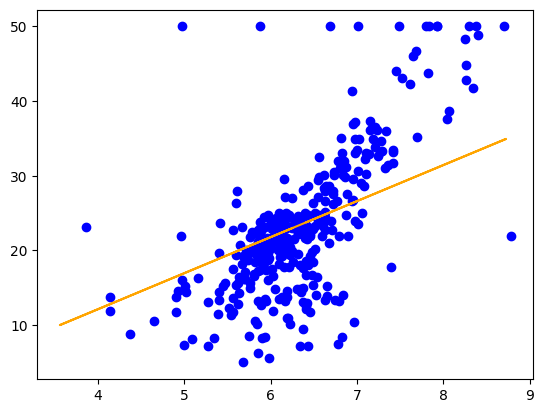

In [46]:
plt.scatter( X_train, y_train, color = 'blue' )
plt.plot( X_test, y_pred, color = 'orange' )
plt.title( '' )
plt.show()

LOGISTIC REGRESSION

In [53]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [101]:
df = pd.read_csv('breast-cancer.csv')

In [102]:
df.shape

(569, 32)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [104]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [105]:
df = df.drop(columns=['id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [107]:
X = df['radius_mean']
y = df['diagnosis']

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df['radius_mean'].values.reshape(-1, 1)
scaler.fit(X)
X = scaler.transform(X)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
print(X_train.shape, y_train.shape)

(455, 1) (455,)


In [72]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [73]:
def compute_cost(predictions, y):
    m = len(y)
    cost = -(1/m) * np.sum([y * np.log(predictions) + (1 - y) * np.log(1 - predictions)])
    return cost

In [74]:
def train_logistic_regression(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    bias = 0

    theta, cost_history = gradient_descent(X, y, theta, bias, learning_rate, iterations)
    return theta, cost_history

In [75]:
def gradient_descent(X, y, theta, bias, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, theta) + bias)
        gradient = (1/m) * np.dot(X.T,(predictions - y))
        theta -= learning_rate * gradient
        cost = compute_cost(predictions, y)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"iteration {i}: Cost = {cost}")

    plt.plot(cost_history, label='Error (MSE)')
    plt.title('Error vs. Iterations in Logistic Regression')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid()
    plt.show()
    return theta, cost_history

In [76]:
def predict(X, theta, threshold=0.6):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= threshold).astype(int)

In [112]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

iteration 0: Cost = 0.6931471805599453
iteration 1000: Cost = 0.5974152847214987
iteration 2000: Cost = 0.5370826194148722
iteration 3000: Cost = 0.4965111435189533
iteration 4000: Cost = 0.46761455635555754
iteration 5000: Cost = 0.44608953503423404
iteration 6000: Cost = 0.42948831093661616
iteration 7000: Cost = 0.4163287722228777
iteration 8000: Cost = 0.40566507759317244
iteration 9000: Cost = 0.396866737337146


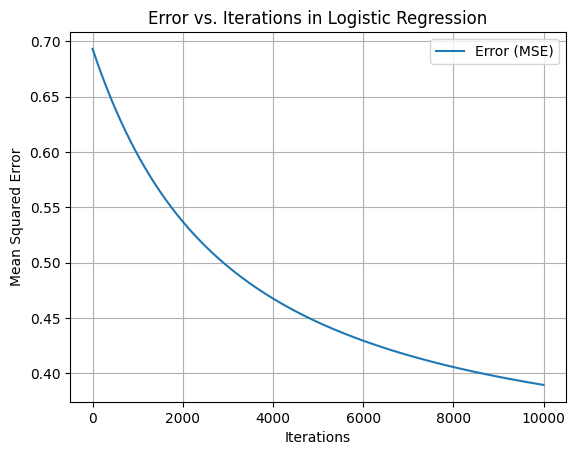

In [113]:
theta, cost_history = train_logistic_regression(X_train, y_train, learning_rate= 0.001, iterations=10000)

<ipython-input-125-9afb381ec05c>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df['radius_mean'], df['diagnosis'], cmap='viridis')
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


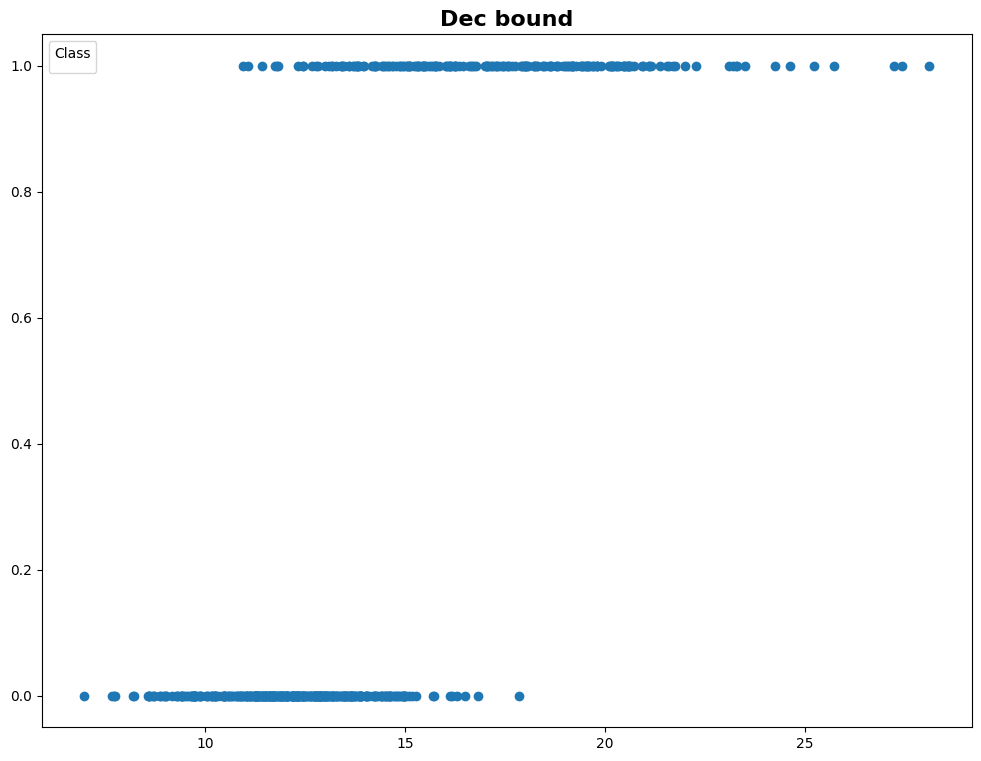

In [125]:
plt.figure(figsize=(12,9))
plt.title('Dec bound', fontweight='bold', fontsize=16)
scatter = plt.scatter(df['radius_mean'], df['diagnosis'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.show()

In [116]:
predictions = predict(X_test, theta)

accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.98%


In [118]:
def my_binary_cross_entropy(true, pred):
    size = len(true)
    err = np.empty(size)
    for i in range(size):
        err[i] = (true[i]*np.log(pred[i]) + (1-true[i])*np.log(1- pred[i]))

    return (-1/size) * np.sum(err)